In [1]:
import sys 
sys.path.append('/home/martin/deep-dereverb/preprocessing/rir_aumentacion')
import tqdm
import acoustics
import librosa
import numpy as np 
import matplotlib.pyplot as plt 
import soundfile as sf
from tr_augmentation import tr_augmentation, get_audio_list
from drr_augmentation import *
from tr_mid import t60_impulse_array

rir_path = '/mnt/datasets/impulsos/reales/C4DM'
rir_list = get_audio_list(rir_path)

def impulse_info(array, fs):
    """Calcula el TRmid (promedio entre bandas de 500 y 1000 Hz) y la relacion
    directo reverberado para una respuesta al impulso 
    """
    #Tiempo de reverberacion
    tr_mid = t60_impulse_array(array, fs).mean()

    #Relacion directo-reverberado
    DRR, _, _ = get_DRR(array, fs)
    
    return tr_mid, DRR

### Respuestas al impulso reales

In [2]:
tr_list=[]
drr_list=[]
room = []

for impulso in tqdm.tqdm(rir_list):
    rir, fs = librosa.load(impulso, sr=16000)
    tr, drr = impulse_info(rir, fs)
    tr_list.append(tr)
    drr_list.append(drr)
    room.append(impulso.split('/')[-3][:-4])

100%|██████████| 638/638 [01:15<00:00,  8.47it/s]


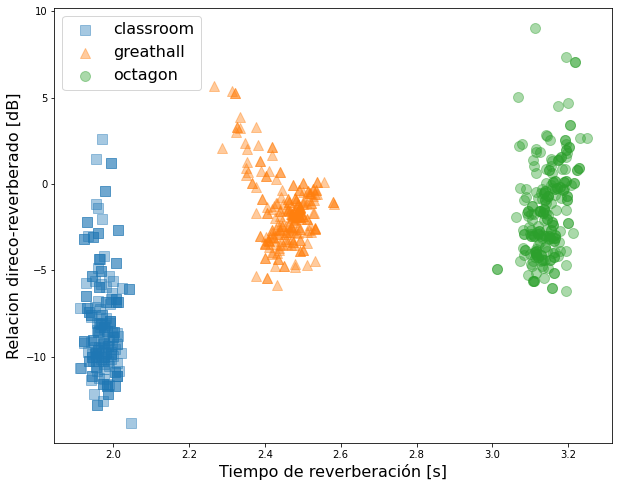

In [3]:
cdict = {'octagon' : 'o', 
        'greathall' : '^',
        'classroom' : 's'}

fig, ax = plt.subplots(1, figsize = (10,8))
for g in np.unique(room):
    ix = np.where(np.array(room)==g)
    ax.scatter(np.array(tr_list)[ix], np.array(drr_list)[ix], marker = cdict[g], label=g, s=100, alpha=0.4)
ax.legend(prop={'size': 16})
ax.set_xlabel('Tiempo de reverberación [s]', fontsize=16)
ax.set_ylabel('Relacion direco-reverberado [dB]', fontsize=16)
plt.savefig('imagenes/reales.png')
plt.show()

### Respuesta al impulso generadas

In [4]:
rir_path = '/home/martin/deep-dereverb/preprocessing/rir_generacion/generados'
rir_list = get_audio_list(rir_path)

tr_list=[]
drr_list=[]
room = []

for impulso in tqdm.tqdm(rir_list):
    rir, fs = librosa.load(impulso, sr=16000)
    tr, drr = impulse_info(rir, fs)
    tr_list.append(tr)
    drr_list.append(drr)
    if impulso.split('/')[-2] == 'room2':
        room.append('Recinto 2')
    else:
        room.append('Recinto 1')
            

100%|██████████| 135/135 [00:00<00:00, 169.19it/s]


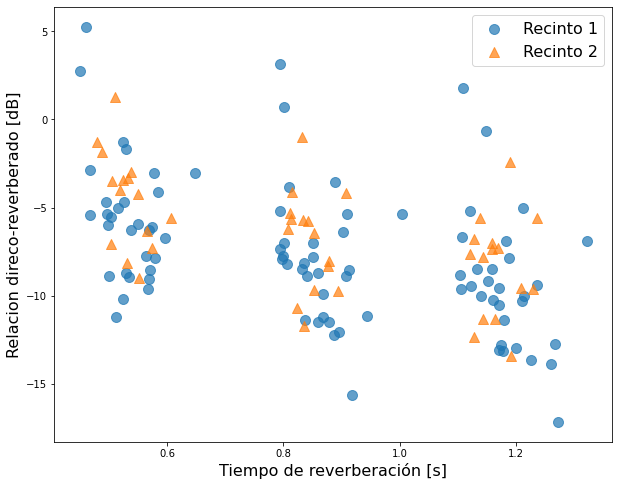

In [5]:
cdict = {'Recinto 1' : 'o', 
        'Recinto 2' : '^'}

fig, ax = plt.subplots(1, figsize = (10,8))
for g in np.unique(room):
    ix = np.where(np.array(room)==g)
    ax.scatter(np.array(tr_list)[ix], np.array(drr_list)[ix], marker = cdict[g], label=g, s=100, alpha=0.7)
ax.legend(prop={'size': 16})
ax.set_xlabel('Tiempo de reverberación [s]', fontsize=16)
ax.set_ylabel('Relacion direco-reverberado [dB]', fontsize=16)
plt.savefig('imagenes/generadas.png')
plt.show()

### Respuestas al impulso aumentadas

In [6]:
rir_path = '/home/martin/deep-dereverb/preprocessing/rir_aumentacion/aumentados'
rir_list = get_audio_list(rir_path)

tr_list=[]
drr_list=[]

for impulso in tqdm.tqdm(rir_list):
    rir, fs = librosa.load(impulso, sr=16000)
    tr, drr = impulse_info(rir, fs)
    tr_list.append(tr)
    drr_list.append(drr)

  0%|          | 0/364 [00:00<?, ?it/s]/home/martin/deep-dereverb/preprocessing/rir_aumentacion/tr_mid.py:56: RuntimeWarning: divide by zero encountered in log10
  sch_db = 10.0 * np.log10(sch / np.max(sch))
100%|██████████| 364/364 [00:03<00:00, 95.41it/s] 


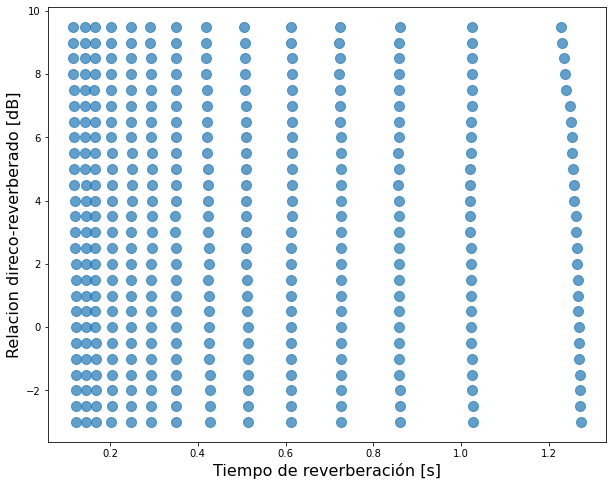

In [7]:
fig, ax = plt.subplots(1, figsize = (10,8))
ax.scatter(np.array(tr_list), np.array(drr_list), s=100, alpha=0.7)
ax.set_xlabel('Tiempo de reverberación [s]', fontsize=16)
ax.set_ylabel('Relacion direco-reverberado [dB]', fontsize=16)
plt.savefig('imagenes/aumentadas.png')
#plt.xlim(0,1.5)
#plt.ylim(-5, 12)
plt.show()